**TASK 1**

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
data=pd.read_csv("Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
#preprocessing
data=pd.get_dummies(data,columns=['Gender'],drop_first=True)
X=data[['Gender_Male','Age','EstimatedSalary']].values
y=data['Purchased'].values

In [10]:
#Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
#Logistic Regression
class LogisticRegression:
    def __init__ (self,learning_rate=0.01,num_itearation=1000):
        self.lr=learning_rate
        self.itearation=num_itearation
        self.weights=None
        self.bias=None
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def fit(self,X,y):
        num_samples,num_features= X.shape
        self.weights=np.zeros(num_features)
        self.bias=0
        
        for i in range(self.itearation):
            linear_model=np.dot(X,self.weights) + self.bias
            y_predicated=self.sigmoid(linear_model)
        
#update
            dw=(1 / num_samples) * np.dot(X.T, (y_predicated - y))
            db = (1 / num_samples) * np.sum(y_predicated - y)
            self.weights -= self.lr * dw
            self.bias=self.lr * db
    
    def predict(self,X):
        linear_model=np.dot(X,self.weights) + self.bias
        return [1 if i>0.5 else 0 for i in self.sigmoid(linear_model)]
    

In [18]:
#train and evaluate
model=LogisticRegression(learning_rate=0.1,num_itearation=1000)
model.fit(X_train,y_train)

predictions=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("classification_report:\n",classification_report(y_test,predictions))

Accuracy: 0.9125
Confusion Matrix:
 [[45  7]
 [ 0 28]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        52
           1       0.80      1.00      0.89        28

    accuracy                           0.91        80
   macro avg       0.90      0.93      0.91        80
weighted avg       0.93      0.91      0.91        80



**Task 2**

In [19]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
data=pd.read_csv("Social_Network_Ads.csv")
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
X=data[['Gender','Age','EstimatedSalary']].values
y=data['Purchased'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))





Accuracy: 0.875
Confusion Matrix:
 [[49  3]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.88      0.75      0.81        28

    accuracy                           0.88        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.88      0.88      0.87        80



**Task 3**

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
data=pd.read_csv("Position_Salaries.csv")
X=data[["Level"]].values
y=data["Salary"].values
#degree 4 poly transform
poly= PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X)
poly_model=LinearRegression()
poly_model.fit(X_poly,y)
#prediction
y_pred=poly_model.predict(X_poly)


In [23]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


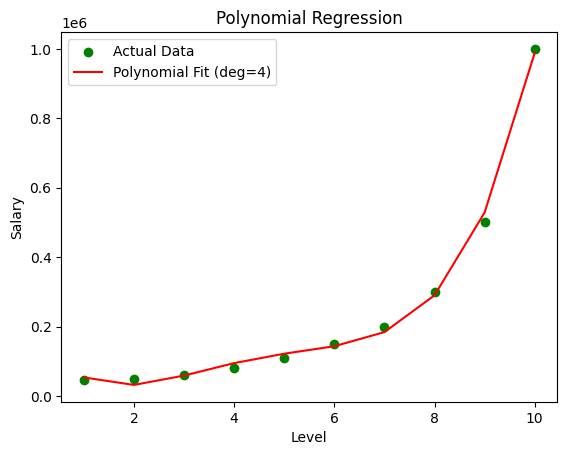

In [25]:
#plot
plt.scatter(X,y,color="green",label="Actual Data")
plt.plot(X,y_pred,color="red",label="Polynomial Fit (deg=4)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

In [26]:
#r2 calculate
r2= r2_score(y,y_pred)
print("Polynomial Regression R²:")
print(f"R2 score :{r2:.4f}")

Polynomial Regression R²:
R2 score :0.9974
